In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

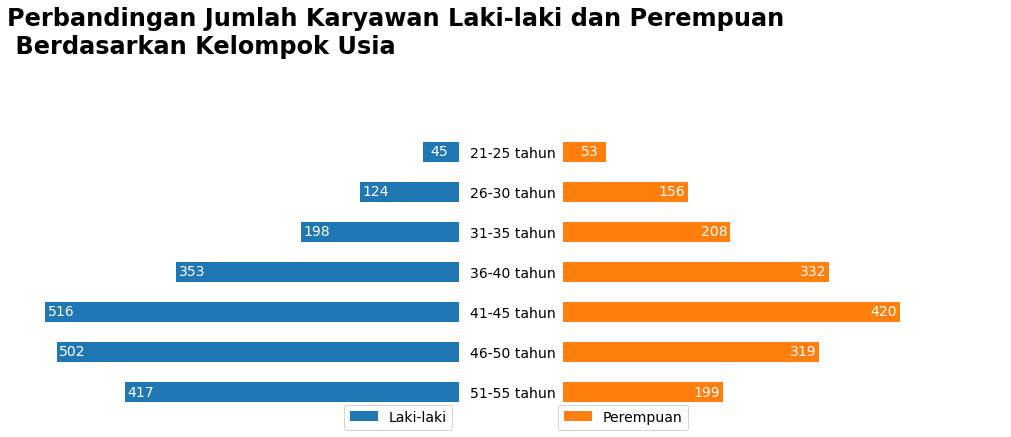

In [45]:
tabel = (pd.read_csv(
    "https://storage.googleapis.com/dqlab-dataset/usia_karyawan.csv"
).sort_values("Kelompok Usia", ascending=False).set_index("Kelompok Usia"))
tabel["Laki-laki"] = -tabel["Laki-laki"]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle(
    "Perbandingan Jumlah Karyawan Laki-laki dan Perempuan\n Berdasarkan Kelompok Usia",
    x=0.,
    y=1.0,
    fontsize=24,
    fontweight="bold",
    ha="left")
tabel["Laki-laki"].plot(kind="barh",
                        ax=axes[0],
                        color="tab:blue",
                        xlim=[-550, 0])
tabel["Perempuan"].plot(kind="barh",
                        ax=axes[1],
                        color="tab:orange",
                        fontsize=14,
                        xlim=[0, 550])
axes[0].set_ylabel("")
axes[0].tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)
axes[0].legend(["Laki-laki"], fontsize=14, bbox_to_anchor=(0., 0., 1., .05))
axes[0].set_frame_on(False)
axes[1].set_ylabel("")
axes[1].tick_params(left=False, bottom=False, labelbottom=False)
axes[1].legend(["Perempuan"], fontsize=14, bbox_to_anchor=(0., 0., 0.3, .05))
axes[1].set_frame_on(False)
for i, m, w in zip(range(tabel.shape[0]), list(tabel["Laki-laki"]),
                   list(tabel["Perempuan"])):
    axes[0].annotate(str(abs(m)), (m + 20, i),
                     xytext=(m + 20, i),
                     color="w",
                     va="center",
                     ha="center",
                     fontsize=14)
    axes[1].annotate(str(abs(w)), (w - 20, i),
                     xytext=(w - 20, i),
                     color="w",
                     va="center",
                     ha="center",
                     fontsize=14)
plt.tight_layout(rect=(0, 0, 1, 0.88))
plt.show()

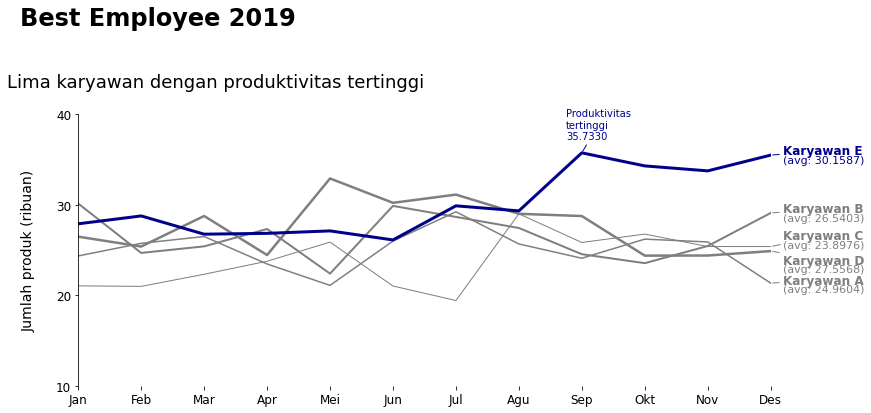

In [46]:
tabel = pd.read_csv(
    "https://storage.googleapis.com/dqlab-dataset/produktivitas_karyawan.csv",
    index_col="Bulan") / 1000

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle("Best Employee 2019",
             x=0.01,
             y=0.95,
             fontsize=24,
             fontweight="bold",
             ha="left")
ax.set_title("Lima karyawan dengan produktivitas tertinggi\n",
             fontsize=18,
             ha="right")

colors = ["tab:gray", "tab:gray", "tab:gray", "tab:gray", "darkblue"]
line_widths = [1.5, 2, 1, 2.5, 3.]
lp = tabel.plot(kind="line",
                ax=ax,
                xlim=[0, 11],
                ylim=[10, 40],
                color=colors,
                xticks=range(tabel.shape[0]),
                yticks=[10, 20, 30, 40])

add_lbl_pos = [0.3, 0.5, 1.2, -1.0, 0.5]
add_avg_pos = [-0.7, -0.5, 0.2, -2.0, -0.5]
for i, item in enumerate(lp.get_lines()):
    item.set_linewidth(line_widths[i])
    lbl = item.get_label()
    ax.annotate(lbl, (11, tabel.loc["Desember", lbl]),
                (11.2, tabel.loc["Desember", lbl] + add_lbl_pos[i]),
                fontweight="bold",
                fontsize=12,
                color=colors[i],
                va="center",
                arrowprops={
                    "arrowstyle": "-",
                    "color": colors[i]
                })
    ax.annotate("(avg: %.4f)" % tabel[lbl].mean(),
                (11, tabel.loc["Desember", lbl]),
                (11.2, tabel.loc["Desember", lbl] + add_avg_pos[i]),
                fontsize=11,
                color=colors[i],
                va="center")
highest_prod = tabel["Karyawan E"].max()
ax.annotate("Produktivitas\ntertinggi\n%.4f" % highest_prod, (8, highest_prod),
            (7.75, highest_prod + 1.5),
            ha="left",
            color=colors[-1],
            arrowprops={
                "arrowstyle": "-",
                "color": colors[-1]
            })
ax.set_xticklabels([item[:3] for item in tabel.index], fontsize=12)
ax.set_yticklabels([str(i) for i in [10, 20, 30, 40]], fontsize=12)
ax.set_xlabel("")
ax.set_ylabel("Jumlah produk (ribuan)\n", fontsize=14)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.get_legend().remove()
plt.tight_layout(rect=(0, 0, 1, 0.90))
plt.show()

In [47]:
dataset = pd.read_csv(
    'https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [48]:
dataset['order_month'] = dataset['order_date'].apply(
    lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


In [49]:
dataset['gmv'] = dataset['item_price']*dataset['quantity']
# dataset['new_columns'] = dataset['item_price'].apply(lambda x: x*2)
dataset.sample(5)

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
3057,1730086,2019-12-11,16469,Jakarta Selatan,DKI Jakarta,P3546,BRAND_S,2,590000,2019-12,1180000
3779,1742035,2019-12-30,18015,Jakarta Selatan,DKI Jakarta,P0340,BRAND_B,4,289000,2019-12,1156000
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000
5,1672906,2019-07-16,12748,Jakarta Utara,DKI Jakarta,P0710,BRAND_C,4,520000,2019-07,2080000
4119,1704676,2019-10-21,13014,Jakarta Selatan,DKI Jakarta,P2933,BRAND_R,5,1045000,2019-10,5225000


In [50]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
monthly_amount

,order_month,gmv
0,2019-07,3524041000
1,2019-08,4452923000
2,2019-09,3947002000
3,2019-10,6719937000
4,2019-11,6182229000
5,2019-12,8148235000


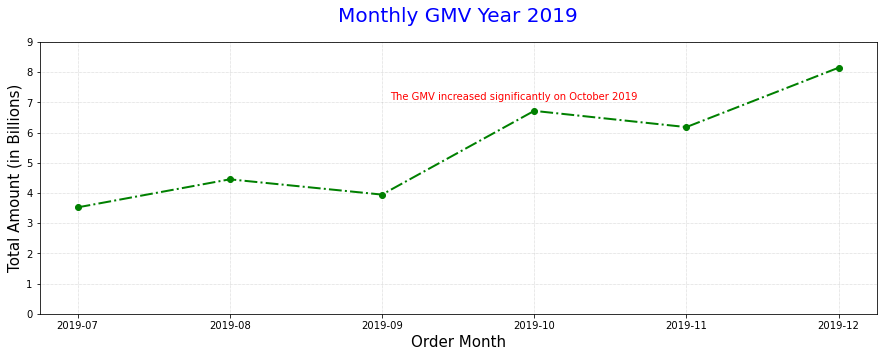

In [51]:
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green',
                                                   marker='o',
                                                   linestyle='-.',
                                                   linewidth=2)
plt.title('Monthly GMV Year 2019',
          loc='center',
          pad=20,
          fontsize=20,
          color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000000000).astype(int))
plt.text(0.45,
         0.72,
         'The GMV increased significantly on October 2019',
         transform=fig.transFigure,
         color='red')
plt.show()

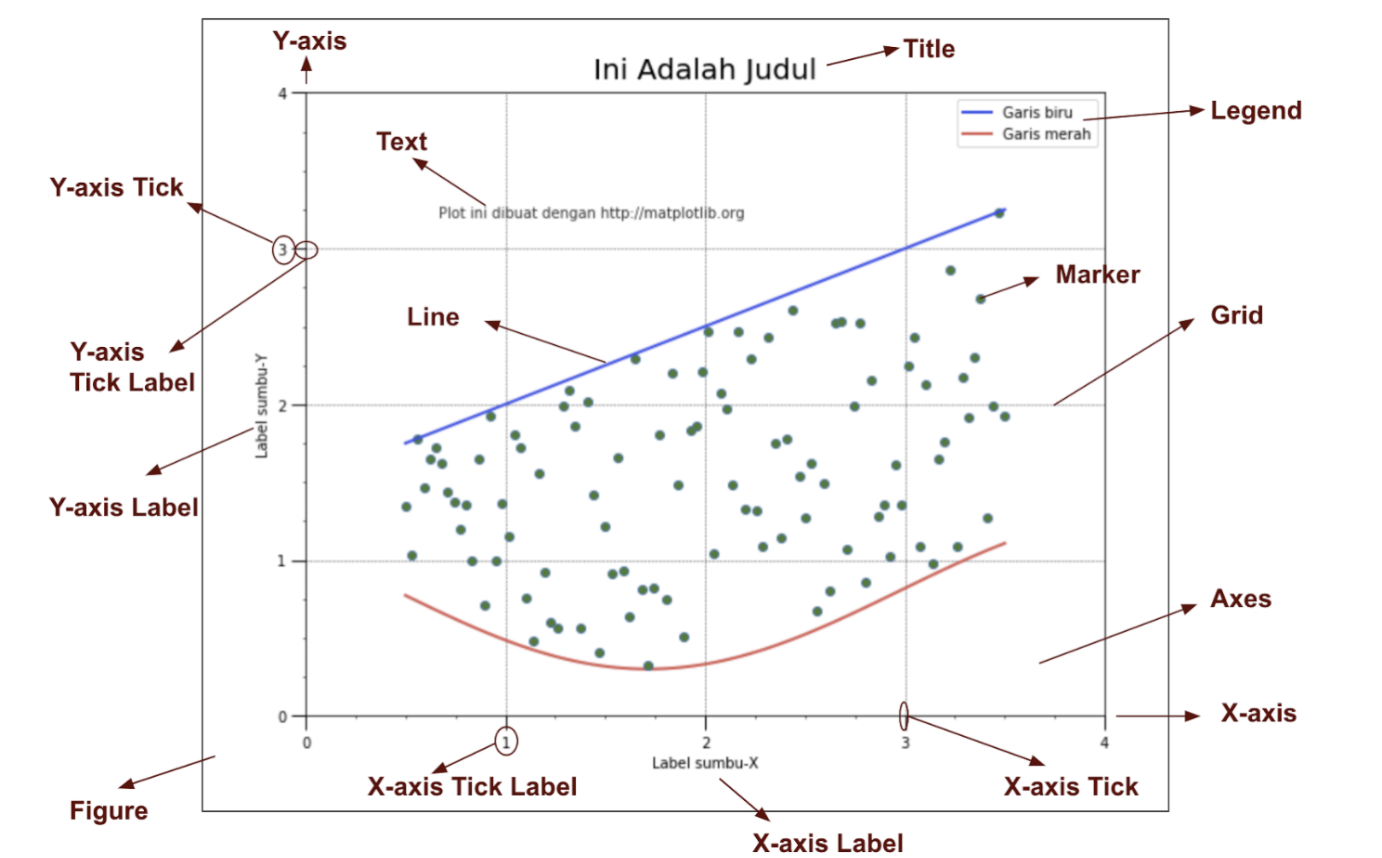

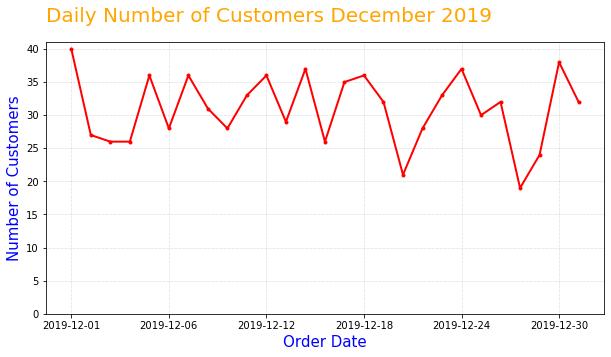

In [63]:
dataset['order_month'] = dataset['order_date'].apply(
    lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
plt.figure(figsize=(10, 5))
dataset[dataset['order_month'] == '2019-12'].groupby(
    ['order_date'])['customer_id'].nunique().plot(color='red',
                                                  marker='.',
                                                  linewidth=2)
plt.title('Daily Number of Customers December 2019',
          loc='left',
          pad=20,
          fontsize=20,
          color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

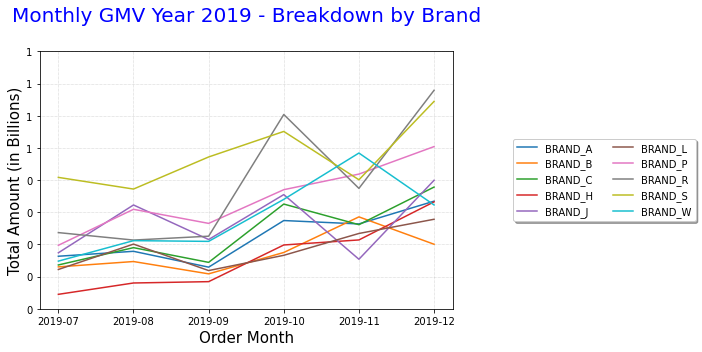

In [4]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

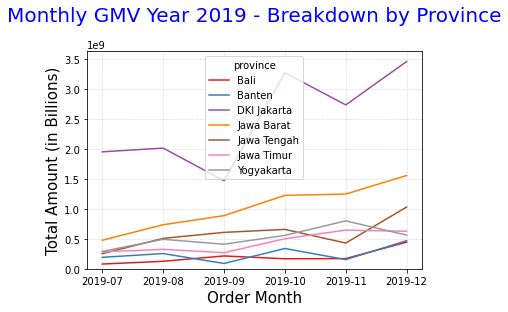

In [5]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.clf()
dataset.groupby(['order_month',  'province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.show()

<Figure size 432x288 with 0 Axes>

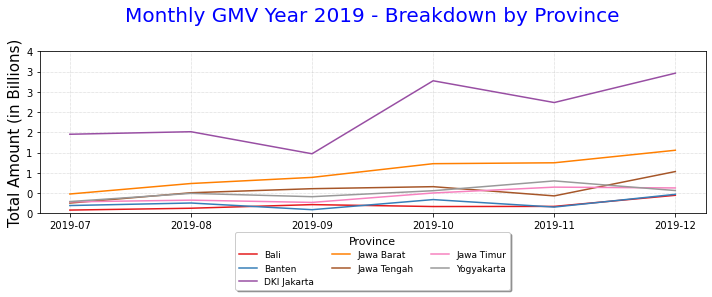

In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.clf()
dataset.groupby(['order_month',  'province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


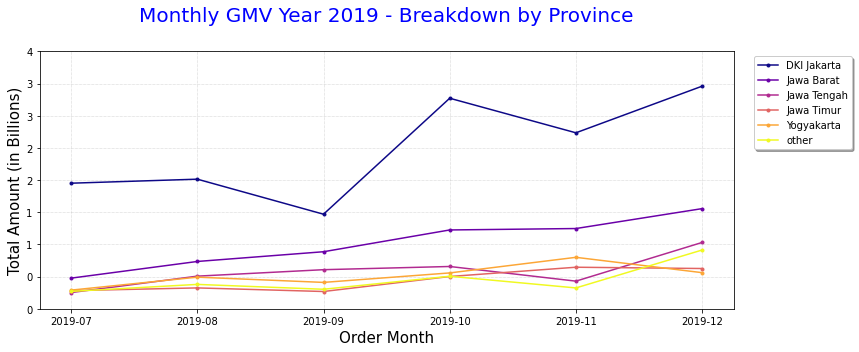

In [9]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv', ascending=False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')


# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(marker = '.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)													
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

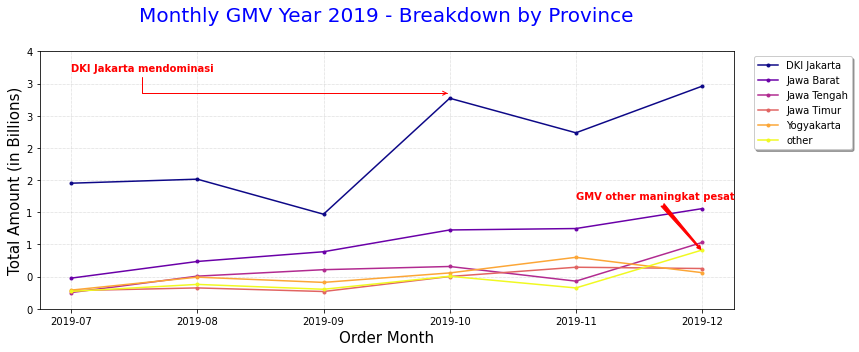

In [12]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000), 
			 xytext=(4, 1700000000), weight='bold', color='red', 
			 arrowprops=dict(arrowstyle='fancy', 
							 connectionstyle='arc3', 
							 color='red'))


# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000), 
			 xytext=(0, 3700000000), weight='bold', color='red', 
			 arrowprops=dict(arrowstyle='->', 
							 connectionstyle='angle', 
							 color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

In [14]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset_dki_q4 = dataset[(dataset['province'] == 'DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
4  BRAND_R         2     4475000     2019-10  8950000  
6  BRAND_C         1     1465000     2019-11  1465000  


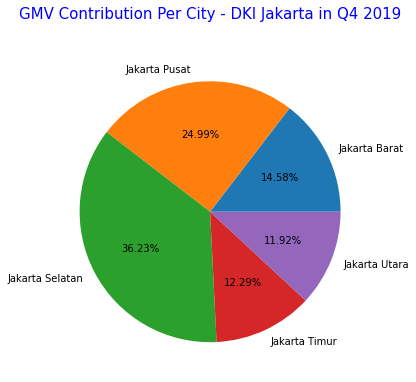

In [15]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels=gmv_per_city_dki_q4['city'], autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

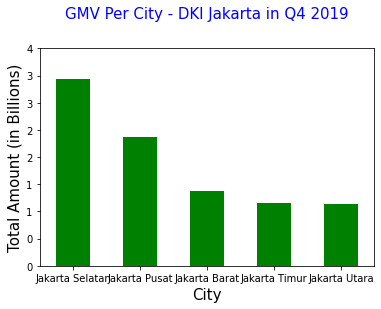

In [16]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()